Activity 2.4
Here's a far more independent task, a big "step up" from previous tasks as you will have to do some searching for answers on how best complete it. The Wisconsin Breast Cancer dataset is another benchmark dataset for machine learning tasks. Find and download the datasets from this repository: http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29 (you will need the wdbc files and not the wpbc files) and train and test a classification model(s) for this data. (You will need to look up how to parse and preprocess some of the data!). Record your metric for your best model.

Now answer the following questions:

Can you think of a few ways of how this model might not be appropriate, or poorly implemented in practice? For example, how would two patients, one with a tumour "on the border" of being malignant, and one with a tumour "safely" benign be classified by our model? Is this correct? Can you think of any adjustments to the algorithm or model that might help remedy this?
Try to explain the real-life impact of differing hyperparameters - for example, differing values of  𝑘  for kNN, or different kernels for SVM.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import the required data.
raw_data = pd.read_csv("breast-cancer-wisconsin.csv")

Firstly, we need to have a look at what the file contains and how its structured

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 699 non-null    int64 
 1   clump_thickness    699 non-null    int64 
 2   size_uniformity    699 non-null    int64 
 3   shape_uniformity   699 non-null    int64 
 4   marginal_adhesion  699 non-null    int64 
 5   epithelial_size    699 non-null    int64 
 6   bare_nucleoli      699 non-null    object
 7   bland_chromatin    699 non-null    int64 
 8   normal_nucleoli    699 non-null    int64 
 9   mitoses            699 non-null    int64 
 10  class              699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


line 7 indicates "object" where all other cols report int64
lets find out the scale of this issue

In [4]:
#So process the col and count how many rows concerned, for now I know the object is a ?
#but in correct code you would need to look for other things, you would think this was a simple thing to do like isint()
#but seems not, so I will not spend time on it now
count = 0
for i in range(699):
    #If cell contains an object report the object and row
    if raw_data["bare_nucleoli"][i]=='?':
        print("Row number is ",i, "   object is ",raw_data["bare_nucleoli"][i])
        count=count+1
        #Counting the number of rows involved
print("Number of rows ",count)

Row number is  23    object is  ?
Row number is  40    object is  ?
Row number is  139    object is  ?
Row number is  145    object is  ?
Row number is  158    object is  ?
Row number is  164    object is  ?
Row number is  235    object is  ?
Row number is  249    object is  ?
Row number is  275    object is  ?
Row number is  292    object is  ?
Row number is  294    object is  ?
Row number is  297    object is  ?
Row number is  315    object is  ?
Row number is  321    object is  ?
Row number is  411    object is  ?
Row number is  617    object is  ?
Number of rows  16


So the data set contains 699 rows in which one column ("bare_nucleoli") returns numeric informatation but also 16 cells containing '?'. If we delete this column we lose 699 - 16 data points i.e. 683, if we delete the People row we lose 12 data row points.
Our do we sustatute something in its place? Dealing with missing data. On doing a Tally 400 cells contain the value 1 so I will use this.

In [5]:
#Now replace ? with 1, again what seems a simple thing it woun't do it, so I updated the file manually
count = 0
for i in range(699):
      if raw_data["bare_nucleoli"][i]=='?':
        raw_data["bare_nucleoli"][i]==1
        count=count+1      
print("Number of rows ",count)

Number of rows  16


In [6]:
raw_data = pd.read_csv("breast-cancer-wisconsin_1.csv")


In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 699 non-null    int64
 1   clump_thickness    699 non-null    int64
 2   size_uniformity    699 non-null    int64
 3   shape_uniformity   699 non-null    int64
 4   marginal_adhesion  699 non-null    int64
 5   epithelial_size    699 non-null    int64
 6   bare_nucleoli      699 non-null    int64
 7   bland_chromatin    699 non-null    int64
 8   normal_nucleoli    699 non-null    int64
 9   mitoses            699 non-null    int64
 10  class              699 non-null    int64
dtypes: int64(11)
memory usage: 60.2 KB


In [8]:
#Exclude the first and last column, the ID is nor required by us, and the last column id the coded outcomes
columns = list(raw_data.columns[1:10])

So now I will apply the three classifier learned on this course so far

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

We will use the function train_test_split to split the data randomly (random_state = 42) into a train and a test set. The test set will correspond to 20% of the total data (test_size = 0.2).

In [11]:
#Select our X and y data
X = raw_data.loc[:,columns] #Assigned above
y = raw_data.loc[:, 'class'] #Coded outcomes
#Now split the training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [12]:
#Here we will use the SVC Classifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
accuracy_all=[]
cvs_all = []

clf = SVC()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

scores = cross_val_score(clf, X, y, cv=5)

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("SVC Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))

SVC Accuracy: 97.14%
Cross validation score: 96.14% (+/- 5.68%)


In [13]:
#Now try the KNN classifier
from sklearn.neighbors import KNeighborsClassifier

model1 = KNeighborsClassifier()
model1.fit(X_train, y_train)
prediction = model1.predict(X_test)
scores = cross_val_score(model1, X, y, cv=5)

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))


Accuracy: 98.57%
Cross validation score: 96.28% (+/- 5.22%)


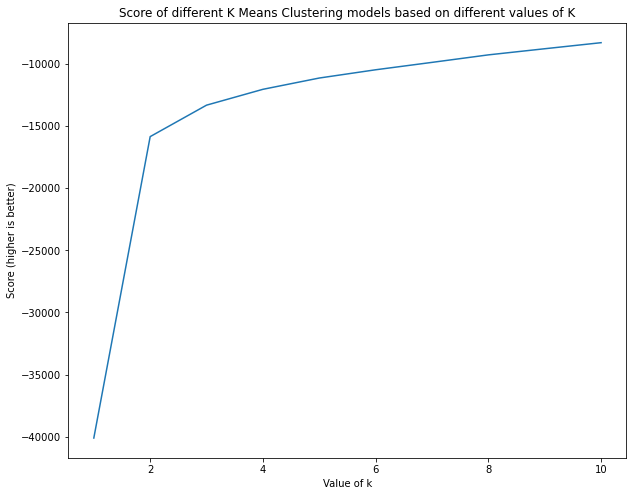

In [14]:
from sklearn.cluster import KMeans
#Take the inward dataset and try different numbers of clusters
#We are doing scoring of each number of clusters
scores = []
trial_num_clus = 11
for i in range(1,trial_num_clus ):
    model2 = KMeans(n_clusters=i) #So we are running i clusters
    model2.fit(X_train, y_train)
    
    # Score the model
    scores.append(model2.score(X_train, y_train))
    
#Now plot the results, which number of clusters causes the greatest change in gradient
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(list(range(1,trial_num_clus)), scores)

ax.set_xlabel("Value of k")
ax.set_ylabel("Score (higher is better)")
ax.set_title("Score of different K Means Clustering models based on different values of K")

plt.show()

In [15]:
# we create an instance of KMeans Classifier and fit the data.
model3 = KMeans(n_clusters=4)
model3.fit(X)

y_pred = model3.predict(X)

prediction = model3.predict(X_test)

scores = cross_val_score(model3, X, y, cv=5)


accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))


Accuracy: 0.71%


The KNN gave the best result at 98.57%, SVC and other kernals (now removed) did slightly less at approx. 97.14%
KMeans 71%.

This software application is used to read images from a medical screening device and classify them, where in the past humans would have had to look and classify these images. The results from the above investigation would suggest an accuracy of 99% for the SVM algorithm, so two people in one hundred could get a false result. However, the accuracy rate for a human reader is 69%, with software having many benefits over humans, especially, it will carry out the classification consistently  every hour of the day, in fact 24 hours a day, plus many other advantages must go in favour of the algorithm.

Here we are talking of false negatives and false positives, so a criterion should be established where the humans keep a quality check on the scans closer to the decision edge. In addition, a control charting process would be advisable to alert the operators if decisions from the software are going close to boundary run rates. So I would suggest that the marginal scan decisions are monitored by qualified humans in order to set confidence levels. 

Only three algorithms were checked in this study, SVM, KNN and KMeans however there maybe other more appropriate algorithms that still need to be tested. 
The algorithms tested showed significant improvements over humans and with additional controls in place that most likely are not in place for humans would add more credibility to the scan outcome.
